# Github Book Reccomendation System

https://github.com/mujtabaali02/Book-Recommendation-System/blob/master/Book_Recommendation_Syatem.ipynb

# Datasets

https://drive.google.com/drive/folders/1Gi0wMWCTigA_rJSi9huyT51lKduBSv43

# Load and Read Data

In [3]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importing users data
File_path='/content/drive/MyDrive/Solent University/COM726_Dissertation/COM726_AE2-Stuff/COM726_AE2_Source-Codes/'
user_data = pd.read_csv(File_path + 'Users.csv')

#Importing books data
books_data = pd.read_csv(File_path + 'Books.csv')

#Importing ratings data
ratings_data = pd.read_csv(File_path + 'Ratings.csv')

<ipython-input-6-cc4d695c6476>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv(File_path + 'Books.csv')


# Initial Data Analysis

In [ ]:
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings_data.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [ ]:
user_data.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
# View how many rows and columns
print(books_data.shape)
print(ratings_data.shape)
print(user_data.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [ ]:
# Check data type and if columns are correctly typed
print(books_data.dtypes)
print()
print(ratings_data.dtypes)
print()
print(user_data.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

User-ID       int64
Location     object
Age         float64
dtype: object


In [ ]:
# Get the number of unique values in each column
print(books_data.nunique())
print()
print(ratings_data.nunique())
print()
print(user_data.nunique())

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

User-ID     278858
Location     57339
Age            165
dtype: int64


In [ ]:
# View the frequency of different values
print(books_data['Book-Title'].value_counts().head(10))  # Top 10 most common book titles
print()
print(ratings_data['User-ID'].value_counts().head(10))  # Top 10 most active users
print()
print(user_data['Location'].value_counts().head(10))   # Top 10 locations among users

Book-Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain               

In [ ]:
# Check for missing values
print(books_data.isnull().sum())
print()
print(ratings_data.isnull().sum())
print()
print(user_data.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
# Check for duplicates
print(books_data.duplicated().sum())
print(ratings_data.duplicated().sum())
print(user_data.duplicated().sum())

0
0
0


In [ ]:
# Summary statistics
print(books_data.describe())
print()
print(ratings_data.describe())
print()
print(user_data.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq          

# Data Preprocessing

In [7]:
# Import necessary data visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

Handling Missing Values and Cleaning the Data -- Users, Books, Ratings

In [8]:
# Missing Value Count Function
def show_missing():
    missing = user_data.columns[user_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(user_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(user_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(user_data)*100,2))

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [9]:
user_data['Age'].describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [10]:
#Fill NaN Values in Age Column with Median
user_data['Age'] =user_data['Age'].fillna(user_data['Age'].median())

In [11]:
#Capping the outlier rows with Percentiles
upper_lim = user_data['Age'].quantile(.95)
lower_lim = user_data['Age'].quantile(.05)
user_data.loc[(user_data["Age"] > upper_lim),"Age"] = upper_lim
user_data.loc[(user_data["Age"] < lower_lim),"Age"] = lower_lim

<ipython-input-12-fb5d2d094581>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(user_data["Age"].dropna())


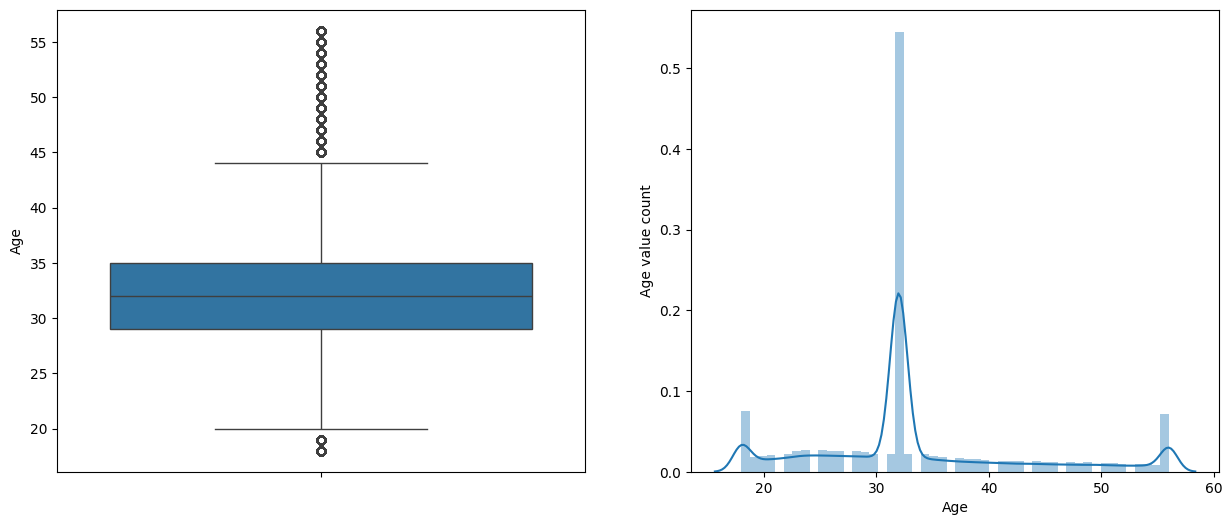

In [12]:
#Boxplot and distplot of Age
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=user_data["Age"])
fig.set_title('')
fig.set_ylabel("Age")

plt.subplot(1, 2, 2)
fig = sns.distplot(user_data["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [13]:
user_data['Age'].describe()

,Age
count,278858.000000
mean,33.402570
std,9.523058
min,18.000000
25%,29.000000
50%,32.000000
75%,35.000000
max,56.000000


In [14]:
#Dropping Nulls of Books data as they are negligible
books_data.dropna(inplace=True)

In [15]:
# Book Data (continued), year of publication is an object and inconsistant for further EDA:
books_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
# Convert years from objects to integers
books_data['Year-Of-Publication'] = pd.to_numeric(books_data['Year-Of-Publication'])

In [17]:
# Calculate the upper and lower limits for capping the outliers
upper_lim = books_data['Year-Of-Publication'].quantile(.95)
lower_lim = books_data['Year-Of-Publication'].quantile(.05)

books_data.loc[(books_data["Year-Of-Publication"] > upper_lim),"Year-Of-Publication"] = upper_lim
books_data.loc[(books_data["Year-Of-Publication"] < lower_lim),"Year-Of-Publication"] = lower_lim
# Verify the changes
print(books_data['Year-Of-Publication'].describe())

count    271353.00000
mean       1993.58746
std           7.61976
min        1976.00000
25%        1989.00000
50%        1995.00000
75%        2000.00000
max        2003.00000
Name: Year-Of-Publication, dtype: float64


In [18]:
# For Ratings dataset:
# Missing Value Count Function
def show_missing():
    missing = ratings_data.columns[ratings_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings_data)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


# Merging the Datasets

For further and consistant EDA and creation of the recommendation system

In [19]:
# Merge users and rating dataframe using the User-ID as the key identifier
users_ratings_df = pd.merge(user_data,ratings_data, on='User-ID')

In [20]:
# Merge combined data of users and ratings with books data with ISBN as key identifier
merged_df = pd.merge(books_data,users_ratings_df, on='ISBN')

In [21]:
# Verify all 3 dataframes merged correctly
merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,0


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031128 non-null  object 
 1   Book-Title           1031128 non-null  object 
 2   Book-Author          1031128 non-null  object 
 3   Year-Of-Publication  1031128 non-null  int64  
 4   Publisher            1031128 non-null  object 
 5   Image-URL-S          1031128 non-null  object 
 6   Image-URL-M          1031128 non-null  object 
 7   Image-URL-L          1031128 non-null  object 
 8   User-ID              1031128 non-null  int64  
 9   Location             1031128 non-null  object 
 10  Age                  1031128 non-null  float64
 11  Book-Rating          1031128 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 94.4+ MB


In [23]:
# Drop unnecessary features
merged_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,0


# Exploratory Data Analysis

Ratings per Book

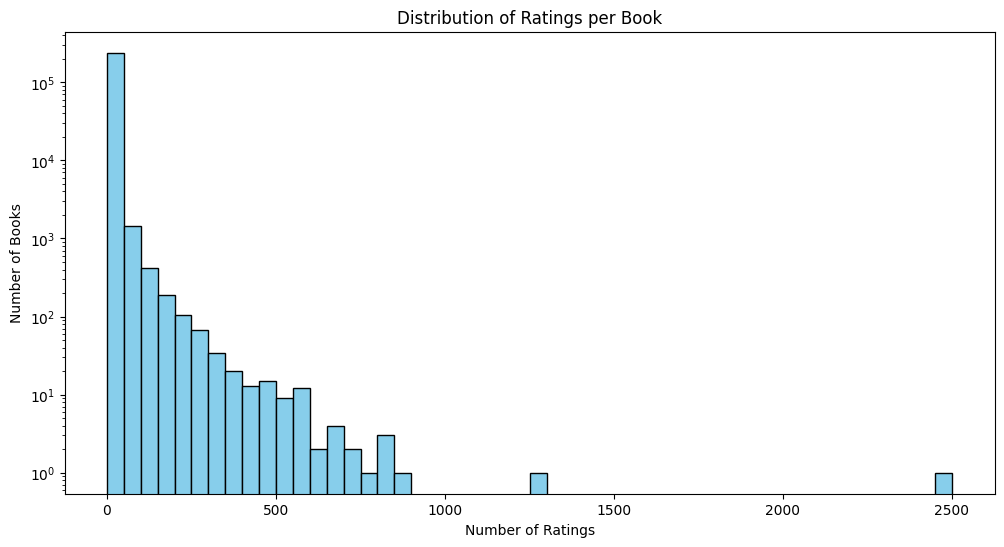

In [ ]:
#Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Book-Title' and count the number of ratings for each book
ratings_per_book = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
ratings_per_book.columns = ['Book-Title', 'Num-Ratings']

# Sort the books by the number of ratings in descending order
ratings_per_book = ratings_per_book.sort_values(by='Num-Ratings', ascending=False)

# Plot the distribution of ratings per book
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_book['Num-Ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.title('Distribution of Ratings per Book')
plt.yscale('log')  # Log scale to account for large skew in the data
plt.show()

Top 10 Most Occuring Books

In [ ]:
# Get the top 10 most frequently occurring books in the dataset
Top10_Book = merged_df['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.columns = ['Book_Title', 'Count']  # Rename columns appropriately

# Check the column names to ensure they were renamed correctly
print(Top10_Book.columns)

Index(['Book_Title', 'Count'], dtype='object')


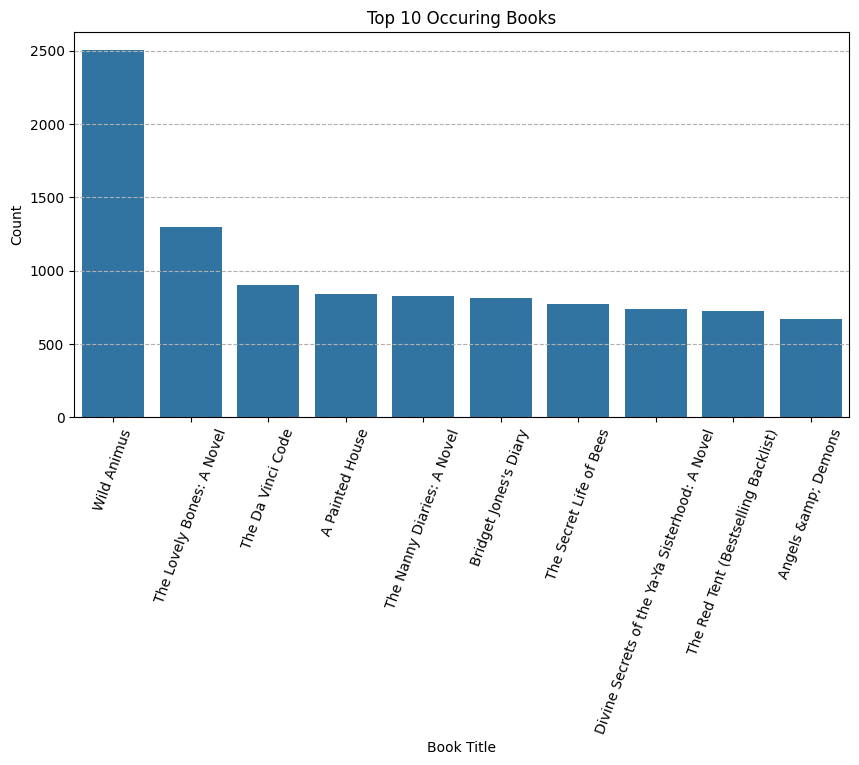

In [ ]:
# Plot the barplot for top 10 books
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x='Book_Title', y='Count', data=Top10_Book)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid(axis='y', linestyle='--')
plt.title('Top 10 Occuring Books')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.show()

Top 10 author with most books written

In [ ]:
# Create a DataFrame of the top 10 authors based on their book count
Top10_author = merged_df['Book-Author'].value_counts().reset_index().head(10)

# Rename columns to clearly indicate author names and count of books
Top10_author.columns = ['Book-Author', 'Count']

# Display the top 10 authors DataFrame
Top10_author

,Book-Author,Count
0,Stephen King,10053
1,Nora Roberts,8429
2,John Grisham,6010
3,James Patterson,5845
4,Mary Higgins Clark,4777
5,Dean R. Koontz,4313
6,Tom Clancy,4036
7,Danielle Steel,3726
8,Sue Grafton,3457
9,Janet Evanovich,3350


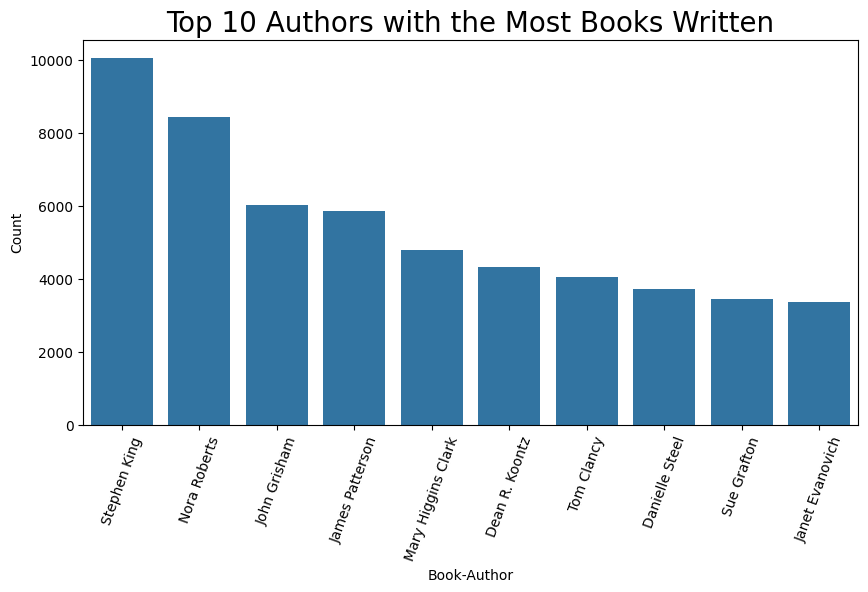

In [ ]:
# Create a barplot for the top 10 authors
sns.barplot(x="Book-Author", y="Count", data=Top10_author)

# Rotate x-axis labels for better readability
plt.xticks(rotation=70, horizontalalignment="center")

# Set plot title and font size
plt.title("Top 10 Authors with the Most Books Written", fontsize=20)

# Display the plot
plt.show()

Top 5 Countries of Users

In [ ]:
#value counts of country
Top10_Country=user_data['Country'].value_counts().reset_index().head(10)
Top10_Country.rename(columns={'index':'Country','Country':'Count'},inplace=True)
Top10_Country

,Count,count
0,usa,139421
1,canada,21601
2,united kingdom,18314
3,germany,17024
4,spain,13096
5,australia,11730
6,italy,11244
7,n/a,5617
8,france,3440
9,portugal,3312


from matplotlib import pyplot as plt
Top10_Country['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Top10_Country['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

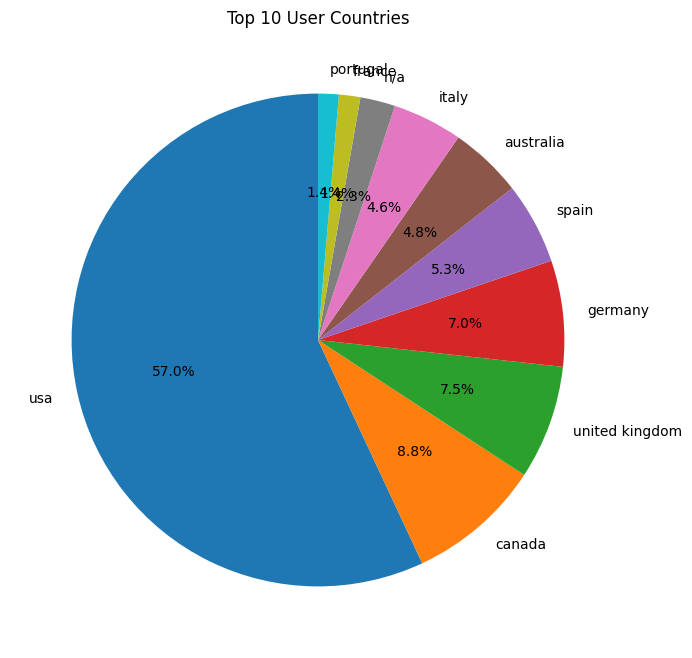

In [ ]:
# @title Top 10 User Countries

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'Top10_Country'
plt.figure(figsize=(8, 8))
plt.pie(Top10_Country['count'], labels=Top10_Country['Count'], autopct='%1.1f%%', startangle=90)
_ = plt.title('Top 10 User Countries')


Correlation Analysis - Numerical Data: Year-Of-Publication, User-ID, Age, and Book-Rating

Correlation Matrix:
                     Year-Of-Publication   User-ID       Age  Book-Rating
Year-Of-Publication             1.000000 -0.008602 -0.009514     0.039285
User-ID                        -0.008602  1.000000 -0.004873    -0.044021
Age                            -0.009514 -0.004873  1.000000    -0.026174
Book-Rating                     0.039285 -0.044021 -0.026174     1.000000


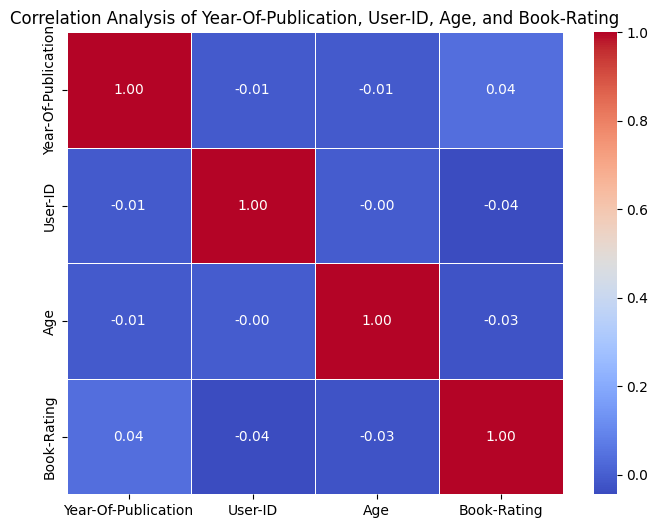

In [ ]:
# Import seaborn module for correlation visulisation
import seaborn as sns

# Extract relevant columns from the merged_df
correlation_data = merged_df[['Year-Of-Publication', 'User-ID', 'Age', 'Book-Rating']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Analysis of Year-Of-Publication, User-ID, Age, and Book-Rating')
plt.show()


Distribution for each Book's Average Rating

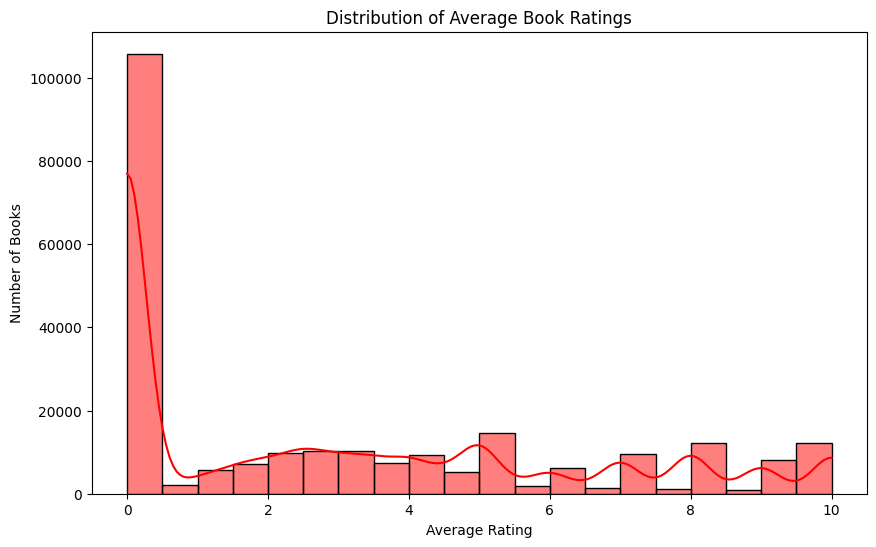

In [ ]:
# Calculate average ratings per book
average_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(average_ratings, bins=20, kde=True, color='red')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Book Ratings')
plt.show()

Average Ratings Plot (Excluding 0 Ratings)

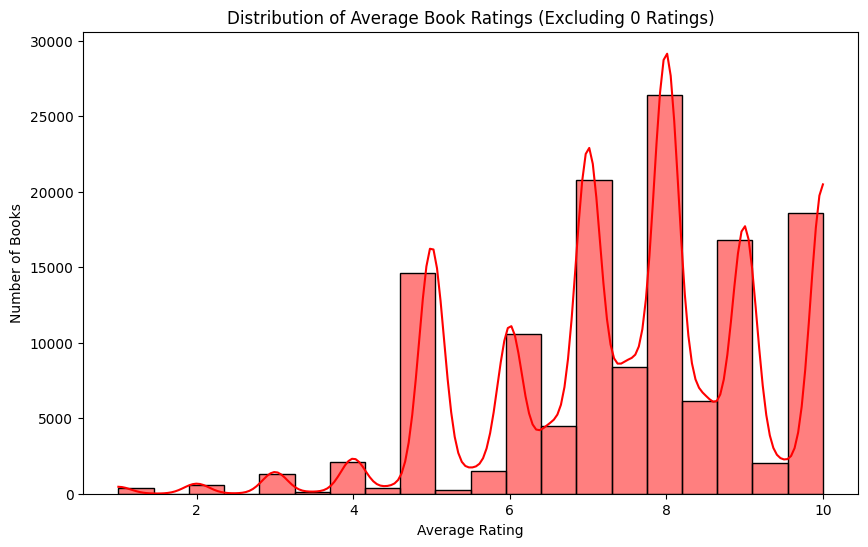

In [ ]:
# Filter out ratings with 0 before calculating the average
filtered_ratings = merged_df[merged_df['Book-Rating'] != 0]

# Calculate average ratings per book using the filtered data
average_ratings = filtered_ratings.groupby('Book-Title')['Book-Rating'].mean()

# Plot the distribution of average ratings (excluding 0 ratings)
plt.figure(figsize=(10, 6))
sns.histplot(average_ratings, bins=20, kde=True, color='red')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Book Ratings (Excluding 0 Ratings)')
plt.show()

# Building the Collaborative Filtering Models

Collaborative filtering methods Collaborative methods for recommender systems are methods that are based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”.

In [24]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357284 sha256=60d3cd123d30cba5326665d68c3774e15a3945ba4e4ddacdbf1401c297c6ce4f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [25]:
# Import necessary libraries and modules from sci-kit learn to begin building reccomendation model
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import ast
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVDpp, accuracy
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise import SVDpp
from surprise import SlopeOne, CoClustering

# SVD++ (from Github)

Data Preparation

In [26]:
#Rating head
ratings_data.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [27]:
#Rating data with exclusion of Books with rating 0
ratings = ratings_data[ratings_data['Book-Rating'] != 0]

#Merging dataframe rating and books on ISBN
df = pd.merge(ratings_data,books_data, on='ISBN')

Implementing KNN - Books which are rated by atleast 10 users

In [28]:
# Books interactionn count
books_interactions_count_df = df.groupby(['ISBN', 'User-ID']).size().groupby('ISBN').size()
print('# of books: %d' % len(books_interactions_count_df))

# Books with enough interactions
books_with_enough_interactions_df = books_interactions_count_df[books_interactions_count_df >= 10].reset_index()[['ISBN']]
print('# of books with at least 10 interactions: %d' % len(books_with_enough_interactions_df))
print(books_with_enough_interactions_df.head(5))

# of books: 270144
# of books with at least 10 interactions: 17479
         ISBN
0  0002005018
1  0002251760
2  0002255081
3  0002257203
4  0002259834


Users which have rated atleast 25 different books

In [29]:
# Users interactionn count
users_interactions_count_df = df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

# Users with enough interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 25].reset_index()[['User-ID']]
print('# of users with at least 25 interactions: %d' % len(users_with_enough_interactions_df))
print(users_with_enough_interactions_df.head(5))

# of users: 92106
# of users with at least 25 interactions: 5541
   User-ID
0      242
1      243
2      254
3      383
4      392


In [30]:
# Users with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_users_df = df.merge(users_with_enough_interactions_df,
               how = 'right',
               on = 'User-ID')
print('# of interactions from users with at least 25 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 1031128
# of interactions from users with at least 25 interactions: 776273


Dataframe of Users and Books with enough interactions

In [31]:
# Users and Books with enough interactions
print('# of interactions: %d' % len(df))
interactions_from_selected_books_and_users_df= interactions_from_selected_users_df.merge(books_with_enough_interactions_df, on = 'ISBN')
print('# of interactions from users with at least 25 interactions and books with at least 10 interactions: %d' % len(interactions_from_selected_books_and_users_df))

# of interactions: 1031128
# of interactions from users with at least 25 interactions and books with at least 10 interactions: 377522


In [32]:
# Interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,242,0553278223,10,The Martian Chronicles,RAY BRADBURY,1984,Spectra,http://images.amazon.com/images/P/0553278223.0...,http://images.amazon.com/images/P/0553278223.0...,http://images.amazon.com/images/P/0553278223.0...
1,242,0971880107,0,Wild Animus,Rich Shapero,2003,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,242,3257208626,8,Fahrenheit 451,Ray Bradbury,1994,Distribooks Inc,http://images.amazon.com/images/P/3257208626.0...,http://images.amazon.com/images/P/3257208626.0...,http://images.amazon.com/images/P/3257208626.0...
3,242,3257233051,9,Veronika Deschliesst Zu Sterben / Vernika Deci...,Paolo Coelho,2002,Distribooks,http://images.amazon.com/images/P/3257233051.0...,http://images.amazon.com/images/P/3257233051.0...,http://images.amazon.com/images/P/3257233051.0...
4,242,3492045642,8,QuerschÃ?Â¼sse - Downsize This!,Michael Moore,2003,Piper,http://images.amazon.com/images/P/3492045642.0...,http://images.amazon.com/images/P/3492045642.0...,http://images.amazon.com/images/P/3492045642.0...


In [33]:
# Shape of interactions from selected books and users dataframe
interactions_from_selected_books_and_users_df.shape

(377522, 10)

In [34]:
# Aggregate all the interactions of users and applying log transformation to rating
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df1 = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df1))
interactions_full_df = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(5)

# of unique user/item interactions: 374843
# of unique user/item interactions: 377522


,User-ID,ISBN,Book-Rating
0,242,0553278223,3.459432
1,242,0971880107,0.000000
2,242,3257208626,3.169925
3,242,3257233051,3.321928
4,242,3492045642,3.169925


In [35]:
#Create a sparse pivot table

df_user_item_matrix = interactions_full_df.pivot(index='ISBN',columns='User-ID',values='Book-Rating').fillna(0)
user_item_matrix_sparse = csr_matrix(df_user_item_matrix.values)
df_user_item_matrix1 = interactions_full_df1.pivot(index='User-ID',columns='Book-Title',values='Book-Rating').fillna(0)
df_user_item_matrix1=df_user_item_matrix1.transpose()
user_item_matrix_sparse1 = csr_matrix(df_user_item_matrix1.values)
user_item_matrix_sparse1=csr_matrix(df_user_item_matrix1.values)

Model Building

In [36]:
#Fitting Model
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)

model.fit(user_item_matrix_sparse1)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

Recommendations for randomly selected book

In [37]:
query_index = np.random.choice(df_user_item_matrix1.shape[0])
distances, indices = model.kneighbors(df_user_item_matrix1.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 16)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Book {0}:\n'.format(df_user_item_matrix1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_item_matrix1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Book A Prince At Last!  (Royally Wed:  The Missing Heir) (Silhouette Romance, 1594):

1: A Princess In Waiting (Royally Wed: The Missing Heir) (Silhouette Romance, No. 1588), with distance of 0.2463783430323001:
2: Turning Point, with distance of 0.3434268078931024:
3: The Perfect Gift (Avon Romance), with distance of 0.3434268078931024:
4: The Princess Is Pregnant! (Crown and Glory) (Silhouette Special Edition, No. 1459), with distance of 0.4111843828140034:
5: Lord Harry (Topaz Historical Romances), with distance of 0.4451312822245568:
6: When the Sacred Ginmill Closes (Matthew Scudder Mysteries (Paperback)), with distance of 0.4451312822245568:
7: Render Up the Body : A Novel of Suspense, with distance of 0.4451312822245568:
8: Three Brides, No Groom, with distance of 0.5584448333670967:
9: Heartless, with distance of 0.5664776307122013:
10: The Center (Center), with distance of 0.5796506890133948:
11: A Long Line of Dead Men (A Matthew Scudder Mystery), with dis

Recommendations based on a specific book

In [38]:
#Model building and recommendation for perticular book
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)

model.fit(user_item_matrix_sparse)

index_to_book = dict()

df_titles_book = df.set_index('ISBN').loc[df_user_item_matrix.index]

count = 0

for index, row in df_titles_book.iterrows():

    index_to_book[count]=row['Book-Title']

    count +=1


def recommender(model, user_item_matrix_sparse, df_book, number_of_recommendations, book_index):

    main_title = index_to_book[book_index]

    dist, ind = model.kneighbors(user_item_matrix_sparse[book_index], n_neighbors=number_of_recommendations+1)

    dist = dist[0].tolist()

    ind = ind[0].tolist()

    titles = []

    for index in ind:

        titles.append(index_to_book[index])

    recommendations = list(zip(titles,dist))

    # sort recommendations

    recommendations_sorted = sorted(recommendations, key = lambda x:x[1])

    # reverse recommendations, leaving out the first element

    recommendations_sorted.reverse()

    recommendations_sorted = recommendations_sorted[:-1]

    print("Recommendations for Book {}: ".format(main_title))

    count = 0

    for (title, distance) in recommendations_sorted:

        count += 1

        print('{}. {}, recommendation score = {}'.format(count, title, round(distance,5)))

recommender(model, user_item_matrix_sparse, df, 10, 10)

Recommendations for Book Clara Callan: 
1. Out of the Silent Planet, recommendation score = 0.74122
2. Her Highness, My Wife, recommendation score = 0.73858
3. Little Green Men : A Novel, recommendation score = 0.73732
4. See Jane Score (Avon Romance), recommendation score = 0.73373
5. Ophelia Speaks : Adolescent Girls Write About Their Search for Self, recommendation score = 0.73182
6. Politically Correct Bedtime Stories: Modern Tales for Our Life and Times, recommendation score = 0.72072
7. The Writing Life, recommendation score = 0.71505
8. Divine Secrets of the Ya-Ya Sisterhood: A Novel, recommendation score = 0.71243
9. When Strangers Marry, recommendation score = 0.70313
10. Do No Harm, recommendation score = 0.64282


Train Test Split And Model Building for SVD++

In [39]:
# Find the minimum rating in the dataset to understand the lowest possible rating given by users
minimum_rating = min(interactions_full_df['Book-Rating'].values)

# Find the maximum rating in the dataset to understand the highest possible rating given by users
maximum_rating = max(interactions_full_df['Book-Rating'].values)

In [40]:
# Define a Reader object with the rating scale from the dataset to specify the range of ratings
reader = Reader(rating_scale=(minimum_rating, maximum_rating))

# Load the dataset into the Surprise library's format, using only the columns needed: User-ID, ISBN, and Book-Rating
data = Dataset.load_from_df(interactions_full_df[['User-ID', 'ISBN', 'Book-Rating']], reader)

In [41]:
# Set test set to 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# Use the SVD++ algorithm
algo = SVDpp()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 1.3223
MAE:  1.0270


1.0270437760847202

In [42]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,242,0553278223,3.459432


In [49]:
# Example user and ISBN number for predicted rating
user_id = '242'

isbn = '0553278223'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 242 for movie with id 0553278223: 1.298


In [50]:
# Predictions- actual and estimated
predictions

[Prediction(uid=226393, iid='0451410491', r_ui=0.0, est=0.5255887239214084, details={'was_impossible': False}),
 Prediction(uid=159033, iid='067103619X', r_ui=0.0, est=0.11072473040146025, details={'was_impossible': False}),
 Prediction(uid=79680, iid='0330262130', r_ui=0.0, est=1.474075253649912, details={'was_impossible': False}),
 Prediction(uid=13093, iid='0671880608', r_ui=2.584962500721156, est=0.37699503991908334, details={'was_impossible': False}),
 Prediction(uid=40943, iid='0394873351', r_ui=3.4594316186372978, est=0.9390390748288777, details={'was_impossible': False}),
 Prediction(uid=123544, iid='044021145X', r_ui=2.0, est=3.3378623032832544, details={'was_impossible': False}),
 Prediction(uid=176887, iid='0440414806', r_ui=3.3219280948873626, est=0.9358186738836615, details={'was_impossible': False}),
 Prediction(uid=50550, iid='038071972X', r_ui=0.0, est=0.08323318046174015, details={'was_impossible': False}),
 Prediction(uid=52917, iid='0061096113', r_ui=3.0, est=1.73157

# Diversity Factor Function using SVD++

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate recommendations function for a Specific User
def recommend_books_svdpp(user_id, top_n=10, diversity_factor=0.3):
    """
    Generate book recommendations for a given user using SVD++ and incorporate diversity.

    Parameters:
    - user_id: ID of the user for which to generate recommendations.
    - top_n: Total number of books to recommend.
    - diversity_factor: Percentage of recommendations to replace with diverse suggestions.

    Returns:
    - A DataFrame containing the recommended books with details.
    - RMSE and MAE evaluation scores (or None if not calculable).
    """
    # Get a list of all unique ISBNs from the original interactions DataFrame
    all_books = interactions_full_df['ISBN'].unique()

    predictions = []
    actual_ratings = []

    for book in all_books:
        # Predict the rating using the algorithm (algo)
        pred = algo.predict(user_id, book)

        # Append predicted rating and actual rating if available
        predictions.append(pred.est)
        actual_ratings.append(pred.r_ui if pred.r_ui is not None else np.nan)

    # Filter out NaN values for actual ratings
    actual_ratings = np.array(actual_ratings)
    predictions = np.array(predictions)
    mask = ~np.isnan(actual_ratings)  # Mask for non-NaN values
    filtered_actual_ratings = actual_ratings[mask]
    filtered_predictions = predictions[mask]

    # Check if there are common books to calculate RMSE and MAE
    if len(filtered_actual_ratings) > 0:
        # Calculate RMSE and MAE
        rmse = np.sqrt(mean_squared_error(filtered_actual_ratings, filtered_predictions))
        mae = mean_absolute_error(filtered_actual_ratings, filtered_predictions)
    else:
        rmse = None
        mae = None
        print("Warning: No common books found to calculate RMSE and MAE.")

    # Sort by predicted rating to get top recommendations
    sorted_predictions = sorted(zip(all_books, predictions), key=lambda x: x[1], reverse=True)
    top_recommendations = sorted_predictions[:top_n]

    # Create a DataFrame for the top recommendations
    recommendation_df = pd.DataFrame(top_recommendations, columns=['ISBN', 'Predicted-Rating'])

    # Introduce Diversity by getting less popular books for diversity
    less_popular_books = interactions_full_df['ISBN'].value_counts().tail(50).index
    num_diverse_books = int(diversity_factor * top_n)
    num_top_books = top_n - num_diverse_books

    # Get less popular recommendations
    diverse_recommendations = []
    for book in less_popular_books:
        diverse_recommendations.append((book, algo.predict(user_id, book).est))

    diverse_recommendations = sorted(diverse_recommendations, key=lambda x: x[1], reverse=True)[:num_diverse_books]

    # Combine top recommendations with diverse recommendations
    final_recommendations = pd.concat([recommendation_df.head(num_top_books),
                                       pd.DataFrame(diverse_recommendations, columns=['ISBN', 'Predicted-Rating'])])
    final_recommendations = final_recommendations.sample(frac=1).reset_index(drop=True)  # Shuffle the final list

    # Ensure exactly `top_n` recommendations
    final_recommendations = final_recommendations.head(top_n)

    # Merge with book details for additional information
    final_recommendations = final_recommendations.merge(books_data, on='ISBN', how='left')


    print(f"Evaluation Metrics - RMSE: {rmse}, MAE: {mae}")

    return final_recommendations[['Book-Title', 'Book-Author', 'Predicted-Rating']], rmse, mae

In [53]:
# Example usage for a given user
user_id = 242
recommended_books_svdpp, rmse, mae = recommend_books_svdpp(user_id, top_n=10, diversity_factor=0.3)

# Display the recommendations
print(recommended_books_svdpp)
print(f"RMSE: {rmse}, MAE: {mae}")

Evaluation Metrics - RMSE: None, MAE: None
                                          Book-Title             Book-Author  \
0  TOLKIEN MAGNETIC POSTCARDS(tm) 12 Full-color M...    Brothers Hildebrandt   
1                             A Kiss for Little Bear  Else Holmelund Minarik   
2                       High Fidelity. (Dt. Ausgabe)             Nick Hornby   
3             Die unendliche Geschichte: Von A bis Z            Michael Ende   
4                              The Horse and His Boy             C. S. Lewis   
5                     The Night the Bear Ate Goombaw      Patrick R. McManus   
6                          Das Zweite GedÃ?Â¤chtnis.             Ken Follett   
7                                    Drums of Autumn          DIANA GABALDON   
8                 El Perfume: Historia De UN Asesino         Patrick Suskind   
9                                   Love You Forever           Robert Munsch   

   Predicted-Rating  
0          3.257842  
1          3.233293  
2         